<a href="https://colab.research.google.com/github/rant95/Advanced-artificial-intelligence/blob/main/Projet_cyclegan_Monet2photo_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet RCP211: Traduction d’image avec le modèle CycleGAN
CNAM 
Année 2021/2022 - semestre 2

Dataset: Monet2photo

Lova Rantoanison

Ce notebook a été adapté suivant l'article de Jun-Yan Zhu et le code de bnsreenu.

- [coImplémentationde originale ](https://github.com/bnsreenu/python_for_microscopists/tree/master/253_254_cycleGAN_monet2photo)
- [Article original](https://arxiv.org/abs/1703.10593)

# Introduction
Bonjour à tous, pour ce projet je vais générer de nouveaux tableaux de Monet en utilisant le jeu de données des tableaux de Monet2photo sur Kaggle

Voici le sommaire du notebook

# Sommaire
1. Importation des bibliothèques nécessaires
1. Chargement des données
1. Construction du modèle de générateur
1. Modèle de discriminateur de bâtiment
1. Construction du modèle CycleGAN
1. Modèle d'entraînement
1. Génération de quelques tableaux
1. Conclusion

# Importer les bibliothèques nécessaires
Dans cette section, je vais importer les bibliothèques que je vais utiliser. On va utiliser google drive pour stocker les données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Chargement des droits pour utiliser API de Kaggle et télécharger les données

In [ ]:
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
 # print('User uploaded file "{name}" with length {length} bytes'.format(
  #    name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
#!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets download -d balraj98/monet2photo

In [ ]:
#!unzip monet2photo

In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing Modul

import matplotlib.pyplot as plt
from random import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, Activation, Concatenate

In [ ]:
#version

print("Tensorflow version: ",tf.__version__)
print("Keras version: ", keras.__version__)

Tensorflow version:  2.8.2
Keras version:  2.8.0


In [ ]:
#importing modulus

from os import listdir
from numpy import asarray
from numpy import vstack
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample

In [ ]:
#install keras-contrib
!pip install git+https://www.github.com/keras-team/keras-contrib.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-uro4tsql
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-uro4tsql
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101077 sha256=42cd1b63645c6a4206ccb40c21ab024622ba6ab718f407e3aeb7b7407963a2c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-yosuwevx/wheels/bb/1f/f2/b57495012683b6b20bbae94a3915ec79753111452d79886abc
Successfully built keras-contrib


In [ ]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

In [ ]:
%cd /content/drive/MyDrive/GAN/Monet2photo/
!ls

/content/drive/MyDrive/GAN/Monet2photo
AtoB_generated_plot_000500.png	BtoA_generated_plot_005500.png
AtoB_generated_plot_001000.png	BtoA_generated_plot_006000.png
AtoB_generated_plot_001500.png	BtoA_generated_plot_006500.png
AtoB_generated_plot_002000.png	BtoA_generated_plot_007000.png
AtoB_generated_plot_002500.png	BtoA_generated_plot_007500.png
AtoB_generated_plot_003000.png	BtoA_generated_plot_008000.png
AtoB_generated_plot_003500.png	BtoA_generated_plot_008500.png
AtoB_generated_plot_004000.png	BtoA_generated_plot_009000.png
AtoB_generated_plot_004500.png	BtoA_generated_plot_009500.png
AtoB_generated_plot_005000.png	BtoA_generated_plot_010000.png
AtoB_generated_plot_005500.png	BtoA_generated_plot_010500.png
AtoB_generated_plot_006000.png	BtoA_generated_plot_011000.png
AtoB_generated_plot_006500.png	BtoA_generated_plot_011500.png
AtoB_generated_plot_007000.png	BtoA_generated_plot_012000.png
AtoB_generated_plot_007500.png	BtoA_generated_plot_012500.png
AtoB_generated_plot_008000.png	

In [ ]:
#path of dataset
path= "/content/drive/MyDrive/GAN/Monet2photo/"

# Chargement du jeu de données
Dans cette section, je vais charger les images.

In [ ]:
#loading images
def load_images(path, size=(256,256)):
    data_list= []
    
    for filename in listdir(path):
        pixels= load_img(path +filename, target_size=size)
        pixels= img_to_array(pixels)
        data_list.append(pixels)
    return asarray(data_list)

In [ ]:
# load dataset A - Monet paintings
dataA_all= load_images(path +"trainA/")
print("loaded dataA: ",dataA_all.shape)

dataA= resample(dataA_all,
                replace=False,
                n_samples=500,
                random_state=10)

loaded dataA:  (1072, 256, 256, 3)


In [ ]:
# load dataset B - Photos 
dataB_all= load_images(path+"trainB/")
print("loaded dataB: ", dataB_all.shape)

dataB= resample(dataB_all,
                replace=False,
                n_samples=500,
                random_state=10)

loaded dataB:  (6287, 256, 256, 3)


* Nous avons déterminé les chemins des images, maintenant nous pouvons les lire.

In [ ]:
#show examples from datasets
def samples_plot (num_samples):
    
    plt.figure(figsize=(num_samples+12,num_samples+7))
    for i in range (num_samples):
        plt.subplot(2,num_samples, 1+i)
        plt.axis("off")
        plt.imshow(dataA[np.random.randint(1,500)].astype('uint8'))
        plt.title("Painting")
        
    for i in range(num_samples):
        plt.subplot(2, num_samples, 1 + num_samples + i)
        plt.axis("off")
        plt.imshow(dataB[np.random.randint(1,500)].astype('uint8'))
        plt.title("Photo")
        
    plt.show()

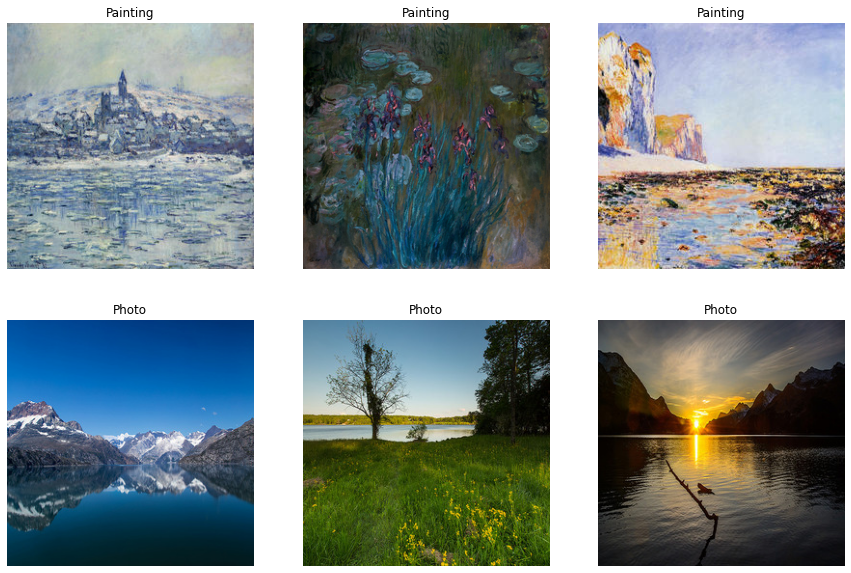

In [ ]:
samples_plot(3)

In [ ]:
data= [dataA, dataB]
print("loaded", data[0].shape, data[1].shape)

loaded (500, 256, 256, 3) (500, 256, 256, 3)


# Construction du modèle de générateur
Dans cette section, je vais construire les réseaux générateurs du CycleGAN.

In [ ]:
#define generator
def generator( image_shape, num_resnet=9):
    model= Sequential()
    initializer= RandomNormal(stddev=0.05)
    input_image= Input(shape=image_shape)
    
    model.add(Conv2D(64,(7,7), padding="same", kernel_initializer=initializer, input_shape=image_shape))
    model.add(InstanceNormalization(axis=-1))
    model.add(Activation("relu"))
    
    model.add(Conv2D(128,(3,3),strides= (2,2), padding="same", kernel_initializer=initializer))
    model.add(InstanceNormalization(axis=-1))
    model.add(Activation("relu"))
    
    model.add(Conv2D(256,(3,3),strides= (2,2), padding="same", kernel_initializer=initializer))
    model.add(InstanceNormalization(axis=-1))
    model.add(Activation("relu"))
    
    for _ in range (num_resnet):
        resnet_block(256, model)
    
    model.add(Conv2DTranspose(128,(3,3), strides= (2,2), padding="same", kernel_initializer=initializer))
    model.add(InstanceNormalization(axis=-1))
    model.add(Activation("relu"))
    
    model.add(Conv2DTranspose(64,(3,3), strides= (2,2), padding="same", kernel_initializer=initializer))
    model.add(InstanceNormalization(axis=-1))
    model.add(Activation("relu"))

    model.add(Conv2D(3,(7,7), padding="same", kernel_initializer=initializer))
    model.add(InstanceNormalization(axis=-1))
    model.add(Activation("tanh"))
    
    return model
    

# Construction du modèle discriminant
Dans cette section, je vais construire le modèle discriminateur qui est un classificateur basé sur CNN. Il détermine si l'image est réelle ou générée.


In [ ]:
#define discriminator
def discriminator (image_shape):
    
    model= Sequential()
    initializer= RandomNormal(stddev=0.05)
    input_image= Input(shape=image_shape)
    
    model.add(Conv2D(64,(4,4), strides=(2,2), padding="same", kernel_initializer=initializer, input_shape= image_shape))
    model.add(LeakyReLU(alpha=0.2))
              
    model.add(Conv2D(128,(4,4), strides=(2,2), padding="same", kernel_initializer=initializer))
    model.add(InstanceNormalization(axis=-1))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256,(4,4), strides=(2,2), padding="same", kernel_initializer=initializer))
    model.add(InstanceNormalization(axis=-1))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(512,(4,4), strides=(2,2), padding="same", kernel_initializer=initializer))
    model.add(InstanceNormalization(axis=-1))
    model.add(LeakyReLU(alpha=0.2))
    
    model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
              
    return model


Nous avons besoin d'une fonction pour définir les blocs ResNet. Il s'agit de blocs composés de deux couches CNN 3×3 où l'entrée du bloc est concaténée à la sortie du bloc, par canal

In [ ]:
#define ResNet
def resnet_block (num_filters, input_layer):
    initializer=RandomNormal(stddev=0.05)
    model= Sequential()
    
    model.add(Conv2D(num_filters,(3,3), padding="same", kernel_initializer=initializer))
    model.add(InstanceNormalization(axis=-1))
    model.add(Activation("relu"))
    
    model.add(Conv2D(num_filters,(3,3), padding="same", kernel_initializer=initializer))
    model.add(InstanceNormalization(axis=-1))
    model.add(Activation("relu"))
    
    return model
    

Ensuite, un modèle composite a deux entrées pour les photos réelles du domaine A et du domaine B, et quatre sorties pour la sortie du discriminateur, l'image générée par l'identité, l'image générée par le cycle avant et l'image générée par le cycle arrière.

In [ ]:
#Combine generator and discriminator blocks
def composite_model (generator_1, discriminator,generator_2, image_shape):
    
    generator_1.trainable= True
    discriminator.trainable= False
    generator_2.trainable= False
    
    #adversarial loss
    input_gen= Input(shape=image_shape)
    gen1_out= generator_1(input_gen)
    output_d= discriminator(gen1_out)
    
    #identity loss
    input_id= Input(shape=image_shape)
    output_id= generator_1(input_id)
    
    #cycle loss- forward
    output_f= generator_1(gen1_out)
    
    #cycle loss- backward
    gen2_out= generator_2(input_id)
    output_b= generator_1(gen2_out)
    
    model= Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
    
    opt= Adam(learning_rate=0.0002, beta_1=0.5)
    
    model.compile(loss=["mse", "mae", "mae", "mae"],
                  loss_weights=[1,5,10,10],
                  optimizer=opt)
    
    return model
    
    

Ensuite, nous pouvons charger notre jeu de données d'images appariées dans un format de tableau NumPy compressé. Cela retournera une liste de deux tableaux NumPy : le premier pour les images sources et le second pour les images cibles correspondantes.

In [ ]:
#reduce data sizes
def preprocess_data(data):
    X1, X2= data[0], data[1]
    
    X1= (X1-127.5) /127.5
    X2= (X2-127.5) /127.5
    
    return [X1,X2]

In [ ]:
#generate real examples
def generate_real_samples(dataset, num_samples, patch_shape):
   
    ix = np.random.randint(0, dataset.shape[0], num_samples)
    
    X = dataset[ix]
    
    y = np.ones((num_samples, patch_shape, patch_shape, 1))
    return X,y

In [ ]:
def generate_fake_samples(generator, dataset, patch_shape):
    
    X= generator.predict(dataset)
    
    y= np.zeros((len(X), patch_shape, patch_shape, 1))
    
    return X,y

In [ ]:
# save current network weights
def save_models(step, generator_AtoB):
    # save the first generator model
    filename1 = 'generator_AtoB_%06d.h5' % (step+1)
    generator_AtoB.save(filename1)
   
    print('>Saved: %s' % (filename1))

La fonction summarize_performance() ci-dessous utilise un modèle de générateur donné pour générer des versions traduites de quelques photographies sources sélectionnées au hasard et enregistre le tracé dans un fichier. 

In [ ]:
# save photos generated
def summarize_performance(step, generator, trainX, name, num_samples=5):
    # select a sample of input images
    X_in, _ = generate_real_samples(trainX, num_samples, 0)
    # generate translated images
    X_out, _ = generate_fake_samples(generator, X_in, 0)
    # scale all pixels from [-1,1] to [0,1]
    X_in = (X_in + 1) / 2.0
    X_out = (X_out + 1) / 2.0
    # plot real images
    for i in range(num_samples):
        plt.subplot(2, num_samples, 1 + i)
        plt.axis('off')
        plt.imshow(X_in[i])
    # plot translated image
    for i in range(num_samples):
        plt.subplot(2, num_samples, 1 + num_samples + i)
        plt.axis('off')
        plt.imshow(X_out[i])
    # save plot to file
    filename1 = '%s_generated_plot_%06d.png' % (name, (step+1))
    plt.savefig(filename1)
    plt.close()

la fonction update_image_pool() pour mieux gérer la rapidité d'apprentissage des modèles discriminants, un pool d'images fausses soit maintenu.

In [ ]:
def update_image_pool(pool, images, max_size=50):
    selected =[]
    for image in images:
        if len(pool) < max_size:
            # stock the pool
            pool.append(image)
            selected.append(image)
        elif random() < 0.5:
            # use image, but don't add it to the pool
            selected.append(image)
        else:
            # replace an existing image and use replaced image
            ix = np.random.randint(0, len(pool))
            selected.append(pool[ix])
            pool[ix] = image
    return np.asarray(selected)

La fonction train() ci-dessous prend les six modèles (deux discriminateurs, deux générateurs et deux modèles composites) comme arguments, ainsi que l'ensemble de données, et entraîne les modèles.

In [ ]:
#training
def train (discriminator_A, discriminator_B, generator_AtoB, composite_AtoB, dataset, epochs=30):
    
    num_epochs, num_batch= epochs, 1
    num_patch = discriminator_A.output_shape[1]
    
    num_patch = discriminator_A.output_shape[1]
    
    trainA, trainB = dataset
    
    poolA, poolB= [], []
    
    batch_per_epochs = int(len(trainA)/num_batch)
    
    num_steps= batch_per_epochs* num_epochs
    
    for i in range (num_steps):
        X_realA, y_realA = generate_real_samples(trainA, num_batch, num_patch)
        X_realB, y_realB = generate_real_samples(trainB, num_batch, num_patch)        
        
        X_fakeA, y_fakeA = generate_fake_samples(generator_BtoA, X_realB, num_patch)
        X_fakeB, y_fakeB = generate_fake_samples(generator_AtoB, X_realA, num_patch)        
        
        X_fakeA = update_image_pool(poolA, X_fakeA)
        X_fakeB = update_image_pool(poolB, X_fakeB)
        
        # update generator B->A via the composite model
        g_loss2, _, _, _, _  = composite_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
        # update discriminator for A -> [real/fake]
        dA_loss1 = discriminator_A.train_on_batch(X_realA, y_realA)
        dA_loss2 = discriminator_A.train_on_batch(X_fakeA, y_fakeA) #supp
        
        # update generator A->B via the composite model
        g_loss1, _, _, _, _ = composite_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
        # update discriminator for B -> [real/fake]
        dB_loss1 = discriminator_B.train_on_batch(X_realB, y_realB)
        dB_loss2 = discriminator_B.train_on_batch(X_fakeB, y_fakeB)
        
        
        if i%100==0:
            print('Iteration>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
            
            
        
        if (i+1) % (batch_per_epochs * 1) == 0:
            # plot A->B translation
            summarize_performance(i, generator_AtoB, trainA, 'AtoB')
           
        if (i+1) % (batch_per_epochs * 5) == 0:
            save_models(i, generator_AtoB)    
    

# Construction du modèle CycleGAN
Dans cette section, je vais construire le modèle CycleGAN en utilisant nos générateurs et nos discriminateurs.



In [ ]:
dataset= preprocess_data(data)

* Our images are ready, let's check them.

In [ ]:
image_shape= dataset[0].shape[1:]
print("image shape: ",image_shape)

image shape:  (256, 256, 3)


In [ ]:
#create cycleGAN model

generator_AtoB = generator(image_shape)
generator_BtoA = generator(image_shape)

discriminator_A = discriminator(image_shape)
discriminator_B = discriminator(image_shape)

composite_AtoB= composite_model(generator_AtoB, discriminator_B, generator_BtoA, image_shape)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Train the model with the monet2photo dataset
from datetime import datetime

start1= datetime.now()

train(discriminator_A, discriminator_B, generator_AtoB, composite_AtoB, dataset, epochs=30)

stop1= datetime.now()

execution_time= stop1-start1

print("Execution time is: ", execution_time )

Iteration>1, dA[0.441,0.258] dB[0.446,0.260] g[18.092,3.506]
Iteration>101, dA[0.342,0.098] dB[0.324,0.088] g[8.248,3.636]
Iteration>201, dA[0.320,0.092] dB[0.315,0.088] g[7.463,2.728]
Iteration>301, dA[0.313,0.062] dB[0.324,0.068] g[8.909,3.246]
Iteration>401, dA[0.306,0.050] dB[0.330,0.055] g[5.611,2.961]
Iteration>501, dA[0.300,0.057] dB[0.300,0.049] g[11.938,6.367]
Iteration>601, dA[0.298,0.059] dB[0.319,0.049] g[6.859,3.974]
Iteration>701, dA[0.290,0.051] dB[0.302,0.075] g[6.830,3.001]
Iteration>801, dA[0.284,0.052] dB[0.294,0.058] g[6.896,3.163]
Iteration>901, dA[0.285,0.097] dB[0.304,0.058] g[6.522,3.158]
Iteration>1001, dA[0.281,0.063] dB[0.279,0.042] g[8.805,4.865]
Iteration>1101, dA[0.274,0.046] dB[0.289,0.052] g[4.726,3.702]
Iteration>1201, dA[0.274,0.056] dB[0.280,0.056] g[5.796,3.086]
Iteration>1301, dA[0.276,0.055] dB[0.286,0.059] g[9.100,4.376]
Iteration>1401, dA[0.269,0.073] dB[0.274,0.069] g[6.214,3.078]
Iteration>1501, dA[0.268,0.045] dB[0.273,0.073] g[7.549,4.441]
It

# Génération de quelques peintures
Dans cette section, je vais générer quelques peintures.

In [ ]:
#choose random sample from dataset

from tensorflow.keras.models import load_model

def select_sample (dataset, num_samples):
    ix= np.random.randint(0, dataset.shape[0], num_samples)
    X=dataset[ix]
    return X

In [ ]:
#display generated images on screen
def show_plot(imagesX, imagesY1):
    images = vstack((imagesX, imagesY1))
    titles = ['Real', 'Generated']
    images = (images + 1) / 2.0
    plt.figure(figsize=(15,10))

    for i in range(len(images)):
        plt.subplot(1, len(images), 1 + i)
        plt.axis('off')
        plt.imshow(images[i])
        plt.title(titles[i])
    plt.show()

In [ ]:
#path of dataset
path= "/content/drive/MyDrive/GAN/Monet2photo/"
%cd /content/drive/MyDrive/GAN/Monet2photo/
!ls

/content/drive/MyDrive/GAN/Monet2photo
AtoB_generated_plot_000500.png	BtoA_generated_plot_005500.png
AtoB_generated_plot_001000.png	BtoA_generated_plot_006000.png
AtoB_generated_plot_001500.png	BtoA_generated_plot_006500.png
AtoB_generated_plot_002000.png	BtoA_generated_plot_007000.png
AtoB_generated_plot_002500.png	BtoA_generated_plot_007500.png
AtoB_generated_plot_003000.png	BtoA_generated_plot_008000.png
AtoB_generated_plot_003500.png	BtoA_generated_plot_008500.png
AtoB_generated_plot_004000.png	BtoA_generated_plot_009000.png
AtoB_generated_plot_004500.png	BtoA_generated_plot_009500.png
AtoB_generated_plot_005000.png	BtoA_generated_plot_010000.png
AtoB_generated_plot_005500.png	BtoA_generated_plot_010500.png
AtoB_generated_plot_006000.png	BtoA_generated_plot_011000.png
AtoB_generated_plot_006500.png	BtoA_generated_plot_011500.png
AtoB_generated_plot_007000.png	BtoA_generated_plot_012000.png
AtoB_generated_plot_007500.png	BtoA_generated_plot_012500.png
AtoB_generated_plot_008000.png	

In [ ]:
# load dataset
A_data = resample(dataA_all, 
                 replace=False,     
                 n_samples=50,    
                 random_state=10) # reproducible results

B_data = resample(dataB_all, 
                 replace=False,     
                 n_samples=50,    
                 random_state=10) # reproducible results

A_data = (A_data - 127.5) / 127.5
B_data = (B_data - 127.5) / 127.5

In [ ]:
# load the models

cust= {"InstanceNormalization" : InstanceNormalization}
model_AtoB= load_model("generator_AtoB_005000.h5", cust)


## **Visualisation**

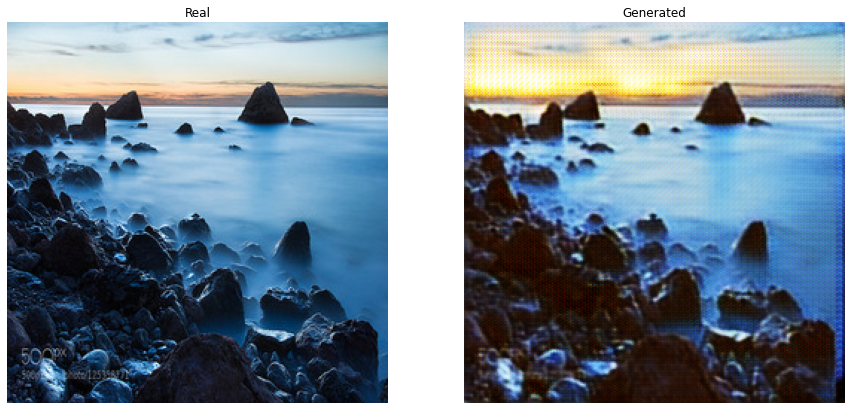

In [ ]:
B_real= select_sample(B_data,1)
A_generated= model_AtoB.predict(B_real)


show_plot(B_real, A_generated)




# Test avec des images

In [ ]:
#test1='../input/kiz-kulesi/kiz_kulesi.jpg'
test2="/content/drive/MyDrive/GAN/Monet2photo/photo_jpg/9670ea6664.jpg"
#test2="/content/drive/MyDrive/GAN/Monet2photo/photo_jpg/3648d77005.jpg"

In [ ]:
def test_model(test_image_path):
    #Load a single custom image
    test_image = load_img(test_image_path, target_size=(256,256))
    test_image = img_to_array(test_image)
    test_image_input = np.array([test_image])  # Convert single image to a batch.
    test_image_input = (test_image_input - 127.5) / 127.5
    
    # plot B->A->B (Photo to Monet to Photo)
    #monet_generated  = model_BtoA.predict(test_image_input)
    #photo_reconstructed = model_AtoB.predict(monet_generated)
    #show_plot(test_image_input, monet_generated, photo_reconstructed)
    
    # plot A -> B -> A (photo to monet to photo)
    monet_generated = model_AtoB .predict(test_image_input)
    
    show_plot(test_image_input, monet_generated)
    
    

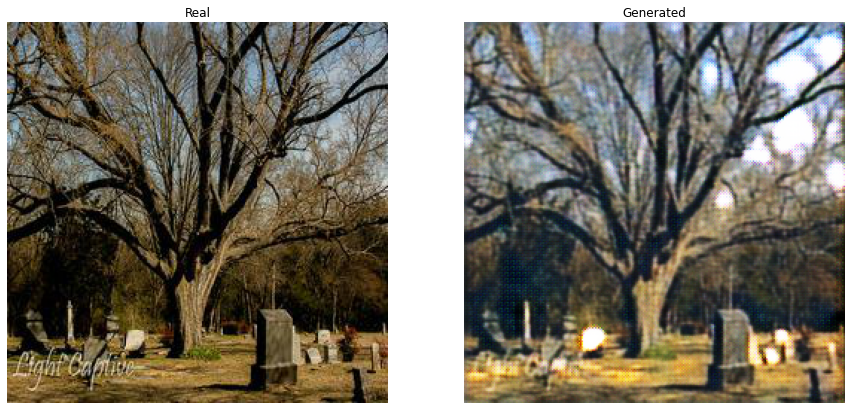

In [ ]:
test_model(test2)